In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import scipy
import numpy as np
import statsmodels.api as sm
import random

#### 网页抓取&作图

D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31179 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\software\Programming\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:1

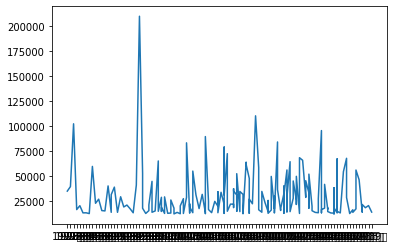

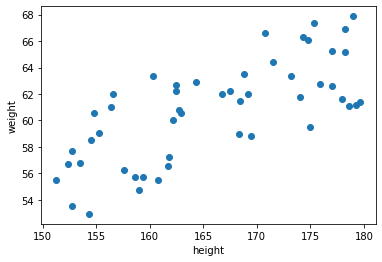

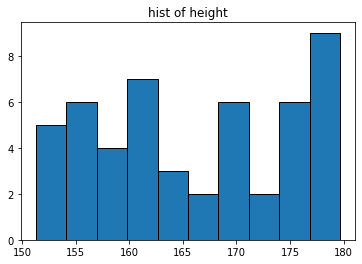

In [18]:
url='https://zh.moegirl.org.cn/%E5%8A%A8%E7%94%BB%E9%94%80%E9%87%8F'
data = pd.read_html(url)[2].sort_values('放送时间')
data["累计销量"]=data["累计销量"].apply(lambda x: x.replace(",","").replace("*","")).astype("int")
# print(data["累计销量"])
plt.plot(data.iloc[:,3],data.iloc[:,2])
plt.show()

n=50
height=np.array(np.random.uniform(1,30,n)+150)
weight=height/3+np.random.uniform(1,10,n)
# print(weight)
plt.scatter(height,weight)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()
plt.hist(height,bins=10,edgecolor = 'black')
plt.title('hist of height')
plt.show()

#### 正态分布&箱线图

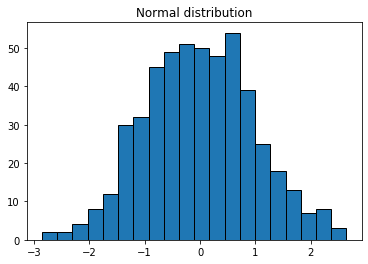

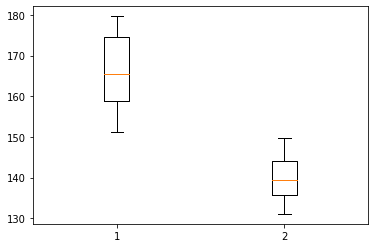

In [19]:
norm=np.random.normal(0,1,500)
plt.hist(x =norm,bins=20,edgecolor = 'black')
plt.title('Normal distribution')
plt.show()
height2=np.array(np.random.uniform(1,20,n)+130)
plt.boxplot((height,height2))
plt.show()

#### 词频统计



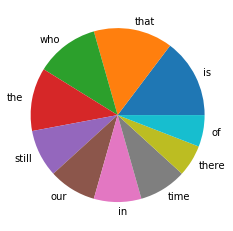

In [20]:
a1="If there is anyone out there who still doubts that America"
a2="is a place where all things are possible who still wonders"
a3="if the dream of our founders is alive in our time who still questions" 
a4="the power of our democracy tonight is your answer It is the answer" 
a5="told by lines that stretched around schools and churches in numbers" 
a6="this nation has never seen by people who waited three hours and four"
a7="hours many for the first time in their lives because they believed that" 
a8="this time must be different, that their voices could be that difference "
speech=' '.join([a1,a2,a3,a4,a5,a6,a7,a8])
frequency = {}
for word in speech.split():
  if word not in frequency:
    frequency[word] = 1
  else:
    frequency[word] += 1
freq=dict(sorted(
    frequency.items(), key = lambda x:x[1],reverse=True)[:10])
plt.pie(list(freq.values()),labels=list(freq.keys()))
plt.show()

#### Exercise Human Resources data


                     wage   age  edu  job  sex
0    [3.4564117754923815]  49.0  2.0  2.0  1.0
1    [1.8573470258425748]  39.0  1.0  2.0  0.0
2    [2.4353108003986703]  39.0  3.0  2.0  0.0
3     [2.314491742561273]  39.0  2.0  2.0  0.0
4    [2.1970485188793356]  22.0  2.0  2.0  1.0
..                    ...   ...  ...  ...  ...
195   [1.494042270773642]  19.0  2.0  3.0  1.0
196  [1.9418432836588697]  29.0  3.0  2.0  1.0
197  [1.8682776139338322]  31.0  3.0  3.0  1.0
198   [2.364899318610493]  42.0  3.0  4.0  1.0
199  [1.9051561276314712]  32.0  1.0  2.0  0.0

[200 rows x 5 columns]


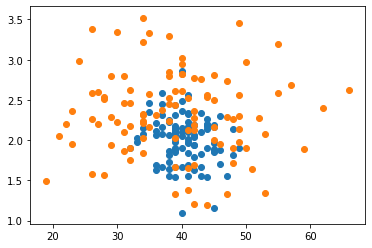

In [21]:
n=200
sex=np.array([round(i,0) for i in list(np.random.uniform(0,1,n))])
edu=[];wage=[];job=[];age=[]
for i in range(n):
    if sex[i]==1:
        edu.append(round(random.uniform(2,3.6),0))
        job.append(round(random.uniform(1.2,4),0))
        wage.append(2.3+.5*np.random.normal(0,1,1))
        age.append(round(40+10*float(np.random.normal(0,1,1)),0))
    else:
        edu.append(round(random.uniform(1,3.6),0))
        job.append(round(random.uniform(1,2.8),0))
        wage.append(2+.3*np.random.normal(0,1,1))
        age.append(round(40+3.5*float(np.random.normal(0,1,1)),0))
sales = [('wage', wage),
         ('age', age),
         ('edu', edu),
         ('job',job),
         ('sex',sex)
         ]
hrdata = pd.DataFrame(dict(sales))
print(hrdata)
for i in range(2):
    x=hrdata.loc[hrdata['sex']==i]['age']
    y=hrdata.loc[hrdata['sex']==i]['wage']
    plt.scatter(x,y)

#### 线性回归与评价

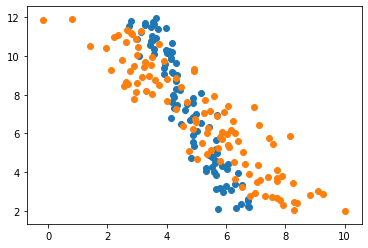

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     728.6
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           6.34e-45
Time:                        01:17:25   Log-Likelihood:                -130.92
No. Observations:                  92   AIC:                             265.8
Df Residuals:                      90   BIC:                             270.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2717      0.494     41.012      0.0

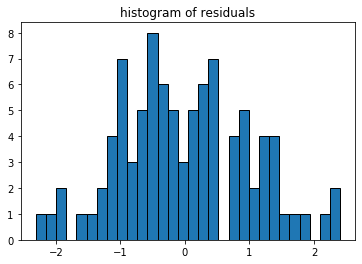

In [22]:
n=200
sex=np.array([round(i,0) for i in list(np.random.uniform(0,1,n))])
temperature=np.arange(2,12,0.05)
ef=.4*np.random.normal(0,1,n)
em=.8*np.random.normal(0,1,n)
appreciation=[]
for i in range(n):
    if sex[i]==0:
        appreciation.append(7-.3*temperature[i]+ef[i])
    else:
        appreciation.append(10-.7*temperature[i]+em[i])

for i in range(2):
    x=[appreciation[a] for a in range(n) if sex[a]==i]
    y=[temperature[a] for a in range(n) if sex[a]==i]
    plt.scatter(x,y)
plt.show()
y = [temperature[a] for a in range(n) if sex[a]==0]
x = [appreciation[a] for a in range(n) if sex[a]==0]
X = sm.add_constant(x)
est=sm.OLS(y,X)
est=est.fit()
print(est.summary())
y_hat=est.predict(X)
diff=y_hat-y
plt.hist(x =diff,bins=30,edgecolor = 'black')
plt.title('histogram of residuals')
plt.show()

#### 曲面&概率分布

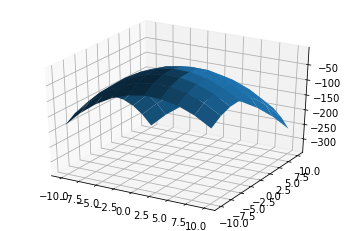

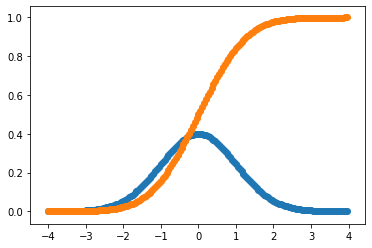

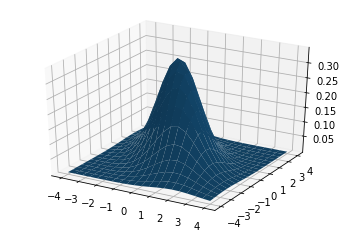

In [23]:
x,y = np.mgrid[-10:10:10j,-10:10:10j]
z = -(-2+x)**2-(4+y)**2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.show()

x=np.arange(-4,4,0.05)
pdf=scipy.stats.norm.pdf(x)
cdf=scipy.stats.norm.cdf(x)
plt.scatter(x,pdf)
plt.scatter(x,cdf)
plt.show()

x,y = np.mgrid[-4:4:20j,-4:4:20j]
varx=.5
vary=.6
covxy= -.3
mx=0
my=0
Sigma=np.array([[varx,covxy],[covxy,vary]])
z=(1/(2*math.pi*np.linalg.det(Sigma)**.5))*np.exp(
    -.5*((vary*(x-mx)**2+(y-my)*(-2*(x-mx)*covxy+varx*(y-my)))/(varx*vary-2*covxy)))
# def norm2(x,y):
#     z=(1/(2*math.pi*np.linalg.det(Sigma)**.5))*math.exp(-.5*((vary*(x-mx)**2+(y-my)*(-2*(x-mx)*covxy+varx*(y-my)))/(varx*vary-2*covxy)))
#     return z
# z=map(norm2(x,y),x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.show()

#### 时间序列

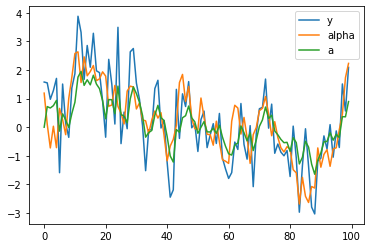

Estimate sigmae,sigmau,z,w,const
true: 0.8 0.4 1 0.8 0
common: 0.7707347975588719 0.4239043848784844 0.9308155835396916 0.856946954310957 0.027465600038254007
conc: 0.7408340293865756 0.3764828263574375 1.0316905090583381 0.8481417344176833 0.026460873819686207
estimate func: (0.7707341361538482, 0.40792203225592477, 0.9488762303161327, 0.8569466676818472, 0.02694266903865705)

Theta method sigmae,sigmau,co
true: 0.7 0.1 0.5
estimate func: 0.7915573714662366 5.781764111673566e-09 0.43398018312522446


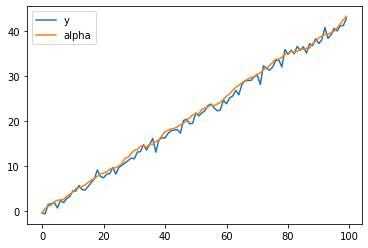

In [24]:
np.random.seed(0)
def StateSpaceGen(sigmae,sigmau,z,w,const,n):
    e=math.sqrt(sigmae)*np.random.normal(0,1,n)
    u=math.sqrt(sigmau)*np.random.normal(0,1,n)
    y,alpha=np.zeros(n),np.zeros(n)
    y[0]=e[0];alpha[0]=u[0]
    for t in range(1,n):
        y[t]=z*alpha[t-1]+e[t]
        alpha[t]=const+w*alpha[t-1]+u[t]
  
    return y,alpha

def KF(sigmae,sigmau,z,w,const,y):
    n=len(y)
    a=np.zeros(n);p=np.zeros(n)
    a[0]=y[0];p[0]=10000
    if(w<1):
        a[0]=0
        p[0]=sigmau/(1-w**2)
    k,v=np.zeros(n),np.zeros(n)
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
        p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau
        v[t]=y[t]-z*a[t-1]
        a[t]=const+w*a[t-1]+k[t]*v[t]
    return a

def LogLike(para):
    sigmae,sigmau,z,w,const=para
    sigmae=abs(sigmae);sigmau=abs(sigmau) 
    z=abs(z);w=abs(w);const=abs(const)
    n=len(y)
    a=[];p=[]
    a.append(y[0]);p.append(10000)
    if(w<1):a[0]=0;p[0]=sigmau/(1-w**2)
    k=np.zeros(n);v=np.zeros(n)
    likelihood=0
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau)
        v[t]=y[t]-z*a[t-1]
        a.append(const+w*a[t-1]+k[t]*v[t])
        likelihood=likelihood+.5*math.log(
            2*math.pi)+.5*math.log(z**2*p[t-1]+sigmae)+.5*(v[t]**2/(z**2*p[t-1]+sigmae))
    return likelihood

def LogLikeConc(para):
    q,z,w,const=para
    q=abs(q)
    z=abs(z);w=abs(w);const=abs(const)
    n=len(y)
    a=[];p=[]
    a.append(y[0]);p.append(10000)
    if(w<1):a[0]=0;p[0]=q/(1-w**2)
    k=np.zeros(n);v=np.zeros(n)
    likelihood=0
    sigmae=0
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
        v[t]=y[t]-z*a[t-1]
        a.append(const+w*a[t-1]+k[t]*v[t])
        sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood=likelihood+.5*math.log(2*math.pi)+.5+.5*math.log(z**2*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


sigmae=.8;sigmau=.4;z=1;w=.8;const=0
y,alp=StateSpaceGen(sigmae,sigmau,z,w,const,100)
a=KF(sigmae,sigmau,z,w,const,y)
plt.plot(y)
plt.plot(alp)
plt.plot(a)
plt.legend(['y','alpha','a'])
plt.show()

print('Estimate sigmae,sigmau,z,w,const')
print('true:',sigmae,sigmau,z,w,const)
result=scipy.optimize.minimize(fun=LogLike,x0=[0.5,0.5,1,0.8,0])
result2=scipy.optimize.minimize(fun=LogLikeConc,x0=[0.5,1,0.8,0])

n=len(y)
q=abs(result2.x[0]);z=abs(result2.x[1])
w=abs(result2.x[2]);co=abs(result2.x[3])
sigmae=0
a=[];p=[]
a.append(y[0]);p.append(10000)
if(w<1):a[0]=0;p[0]=q/(1-w**2)
k=np.zeros(n);v=np.zeros(n)
for t in range(1,n):
    k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
    p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
    v[t]=y[t]-z*a[t-1]
    a.append(co+w*a[t-1]+k[t]*v[t])
    sigmae=sigmae+v[t]**2/(z**2*p[t-1]+1)



#This is the variance of e
sigmae=sigmae/(n-1)
#This is the variance of u  
sigmau=q*sigmae


def estimateComm(y):
    n=len(y)
    a=np.zeros(n);p=np.zeros(n)
    a[0]=(y[0]);p[0]=(10000)
    k=np.zeros(n);v=np.zeros(n)
    
    def LogLike(para):
        sigmae,sigmau,z,w,const=para
        sigmae=abs(sigmae);sigmau=abs(sigmau) 
        z=abs(z);w=abs(w);const=abs(const)
        n=len(y)
        a=[];p=[]
        a.append(y[0]);p.append(10000)
        if(w<1):a[0]=0;p[0]=sigmau/(1-w**2)
        k=np.zeros(n);v=np.zeros(n)
        likelihood=0
        for t in range(1,n):
            k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
            p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau)
            v[t]=y[t]-z*a[t-1]
            a.append(const+w*a[t-1]+k[t]*v[t])
            likelihood=likelihood+.5*math.log(
                2*math.pi)+.5*math.log(z**2*p[t-1]+sigmae)+.5*(v[t]**2/(z**2*p[t-1]+sigmae))
        return likelihood
    
    def func(para):
        sigmae,sigmau,z,w,const=para
        sigmae=abs(sigmae);sigmau=abs(sigmau) 
        z=abs(z);w=abs(w);const=abs(const)
        if(w<1):a[0]=0;p[0]=sigmau/(1-w**2)
        likelihood=0
        for t in range(1,n):
            k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
            p[t]=(w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau)
            v[t]=y[t]-z*a[t-1]
            a[t]=(const+w*a[t-1]+k[t]*v[t])
            likelihood=likelihood+.5*math.log(
                2*math.pi)+.5*math.log(z**2*p[t-1]+sigmae)+.5*(v[t]**2/(z**2*p[t-1]+sigmae))
        return likelihood
    
    result=scipy.optimize.minimize(fun=func,x0=[0.5,0.5,1,0.8,0])
    sigmae,sigmau,z,w,const=result.x.tolist()
    return abs(sigmae),abs(sigmau),abs(z),abs(w),abs(const)

def estimateConc(y):
    n=len(y)
    a=[];p=[]
    a.append(y[0]);p.append(10000)
    k=np.zeros(n);v=np.zeros(n)
    
    def func(para):
        q,z,w,const=para
        q=abs(q)
        z=abs(z);w=abs(w);const=abs(const)
        if(w<1):a[0]=0;p[0]=q/(1-w**2)
        likelihood=0
        sigmae=0
        for t in range(1,n):
            k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
            p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
            v[t]=y[t]-z*a[t-1]
            a.append(const+w*a[t-1]+k[t]*v[t])
            sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
            likelihood=likelihood+.5*math.log(2*math.pi)+.5+.5*math.log(z**2*p[t-1]+1)
        return likelihood+.5*n*math.log(sigmae/n)
    
    result2=scipy.optimize.minimize(fun=func,x0=[0.5,1,0.8,0])

    q=abs(result2.x[0]);z=abs(result2.x[1])
    w=abs(result2.x[2]);co=abs(result2.x[3])
    sigmae=0
    a=[];p=[]
    a.append(y[0]);p.append(10000)
    if(w<1):a[0]=0;p[0]=q/(1-w**2)
    k=np.zeros(n);v=np.zeros(n)
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
        v[t]=y[t]-z*a[t-1]
        a.append(co+w*a[t-1]+k[t]*v[t])
        sigmae=sigmae+v[t]**2/(z**2*p[t-1]+1)
    
    sigmae=sigmae/(n-1)
    sigmau=q*sigmae
    return sigmae,sigmau,z,w,const

def estimateTheta(y):
    n=len(y)
    a=np.zeros(n);p=np.zeros(n)
    a[0]=y[0];p[0]=0
    k=np.zeros(n);v=np.zeros(n)
    def func(para):
        q,const=para
        z,w=1,1
        q=abs(q)
        z=abs(z);w=abs(w);const=abs(const)
        # if(w<1):a[0]=0;p[0]=q/(1-w**2)
        likelihood=0
        sigmae=0
        for t in range(1,n):
            k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
            p[t]=(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
            v[t]=y[t]-z*a[t-1]
            a[t]=(const+w*a[t-1]+k[t]*v[t])
            sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
            likelihood=likelihood+.5*math.log(2*math.pi)+.5+.5*math.log(z**2*p[t-1]+1)
        return likelihood+.5*n*math.log(sigmae/n)
    
    result2=scipy.optimize.minimize(fun=func,x0=[0.6,0.3])

    q=abs(result2.x[0])
    co=abs(result2.x[1])
    z,w=1,1
    sigmae=0
    v[0]=0
    a=np.zeros(n);p=np.zeros(n)
    a[0]=y[0];p[0]=0
    # if(w<1):a[0]=0;p[0]=q/(1-w**2)
    k=np.zeros(n);v=np.zeros(n)
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t]=y[t]-z*a[t-1]
        a[t]=(co+w*a[t-1]+k[t]*v[t])
        sigmae=sigmae+v[t]**2/(z**2*p[t-1]+1)
    sigmae=sigmae/(n-1)
    sigmau=q*sigmae
    return sigmae,sigmau,co

sigmae1,sigmau1,z1,w1,const1=result.x.tolist()
print('common:',sigmae1,sigmau1,z1,w1,const1)
print('conc:',sigmae,sigmau,z,w,co)

print('estimate func:',estimateComm(
    y
    # StateSpaceGen(.8,.4,1,.8,0,150)[0]
))


sigmae=.7;sigmau=.1;z=1;w=1;const=0.5
y,alp=StateSpaceGen(sigmae,sigmau,z,w,const,100)
plt.plot(y)
plt.plot(alp)
plt.legend(['y','alpha'])
print('\nTheta method sigmae,sigmau,co')
print('true:',sigmae,sigmau,const)
sigmae,sigmau,const=estimateTheta(
    y
    # StateSpaceGen(sigmae,sigmau,z,w,const,100)[0]
)
print('estimate func:',sigmae,sigmau,const)

#### AR(1)+noise --> ARIMA(1,0,1) in the single source of noise
#### Damped trend model in the single source of error

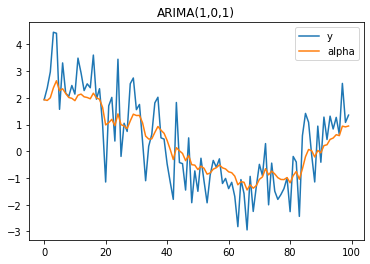

true 0.2 0.94
estimate [0.35944222 0.95546874]
true 0.6 0.2 0.93
estimate [0.5842267  0.26393119 0.92449935]


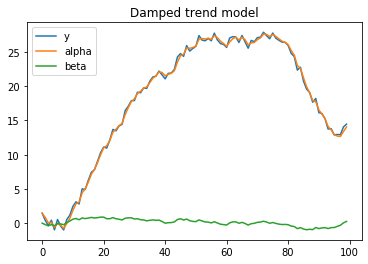

In [25]:
np.random.seed(0)
n=100
e=math.sqrt(1.2)*np.random.normal(0,1,n)
gamma=.2
w=.94
y=np.zeros(n);alpha=np.zeros(n)
y[0]=e[0];alpha[0]=e[0]
for t in range(1,n):
    y[t]=alpha[t-1]+e[t]
    alpha[t]=w*alpha[t-1]+gamma*e[t]

plt.plot(y)
plt.plot(alpha)
plt.legend(['y','alpha'])
plt.title('ARIMA(1,0,1)')
plt.show()

#### estimate the parameters of the above model

a=np.zeros(n)
a[0]=0
ee=np.zeros(n).reshape(n,1)
def fu(mypa):
    gamma,w=mypa
    gamma=abs(gamma);w=abs(w) 
    for t in range(1,n):
        ee[t]=y[t]-a[t-1]
        a[t]=w*a[t-1]+gamma*ee[t]

    return sum(ee**2)/n

results=scipy.optimize.minimize(fun=fu,x0=[0.2,0.1])
print('true',gamma,w)
print('estimate',results.x)

###### Generate the damped trend model in the single source of error

e=math.sqrt(.6)*np.random.normal(0,1,n)
gamma=.6
theta=.2
phi=.93
y,alpha,beta=np.zeros(n),np.zeros(n),np.zeros(n)
y[0]=e[0];alpha[0]=e[0]
beta[0]=0
for t in range(1,n):
    beta[t]=phi*beta[t-1]+theta*e[t]
    alpha[t]=alpha[t-1]+phi*beta[t-1]+gamma*e[t]
    y[t]=alpha[t-1]+phi*beta[t-1]+e[t]

plt.plot(y)
plt.plot(alpha)
plt.plot(beta)
plt.legend(['y','alpha','beta'])
plt.title('Damped trend model')
plt.show()
##### Damped trend estimation

a,b=np.zeros(n),np.zeros(n)
a[0]=y[0]
b[0]=0
ee=np.zeros(n).reshape(n,1)
def fu(mypa):
    gamma=abs(mypa[0])
    theta=abs(mypa[1])
    phi=abs(mypa[2])
    for t in range(1,n):
        ee[t]=y[t]-a[t-1]-phi*b[t-1]
        a[t]=a[t-1]+phi*b[t-1]+gamma*ee[t]
        b[t]=phi*b[t-1]+theta*ee[t]

    return sum(ee**2)/n

results=scipy.optimize.minimize(fun=fu,x0=[0.2,0.1,0.8])
print('true',gamma,theta,phi)
print('estimate',results.x)


#### Seasonality

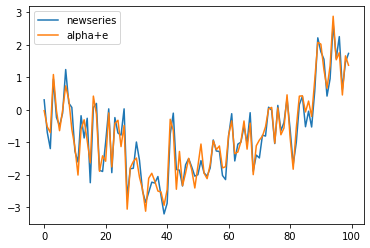

[5, -4, 2, -3]
[ 5.03675613 -4.04303092  2.14322332 -3.13694854]
[1.7, 0.3, 1.9, 0.1]
[1.63440305 0.27924075 1.97811233 0.10824388]


D:\software\Programming\anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide


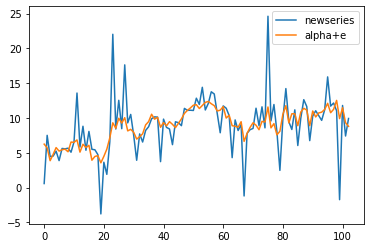

In [26]:
np.random.seed(243)
n=100
e=math.sqrt(.3)*np.random.normal(0,1,n)
u=math.sqrt(.1)*np.random.normal(0,1,n)
y,alpha=np.zeros(n).reshape(n,1),np.zeros(n)
factor=[5,-4,2,-3]
s=4
seasonal=(factor*math.ceil(n/s))[0:n]

y[0]=e[0]+seasonal[0];alpha[0]=u[0]
for t in range(1,n):
    y[t]=seasonal[t]+alpha[t-1]+e[t]
    alpha[t]=alpha[t-1]+u[t]


w=[1/s]*(s+1)
w[0]=1/2/s;w[s]=1/2/s
cma=np.zeros(n).reshape(n,1)
for g in range(len(y)-s):
    i=int(g+s/2)
    cma[i]=np.sum(w*y[g:(g+s+1)].T)
residuals=y-cma
factors=np.zeros(s)
for seas in range(s):
    factors[seas]=np.mean(residuals[np.arange(seas,len(y)-s+seas+1,s)])
    # print(factors)

factors=factors-np.mean(factors)
newseries=y-np.tile(factors,math.ceil(n/s)).reshape(n,1)
plt.plot(newseries)
plt.plot(alpha+e)
plt.legend(['newseries','alpha+e'])
plt.show()
print(factor)
print(factors)

# multiplicative
np.random.seed(10)
n=103
s=4
e=math.sqrt(.5)*np.random.normal(0,1,n)
u=math.sqrt(.4)*np.random.normal(0,1,n)
y,alpha=np.zeros(n).reshape(n,1),np.zeros(n)
factor=[1.7,.3,1.9,.1]
seasonal=(factor*math.ceil(n/s))[0:n]
y[0]=e[0];alpha[0]=5+u[0]

for t in range(1,n):
    y[t]=seasonal[t]*alpha[t-1]+e[t]
    alpha[t]=alpha[t-1]+u[t]

# extract the seasonal component
w=[1/s]*(s+1)
w[0]=1/2/s;w[s]=1/2/s
cma=np.zeros(n).reshape(n,1)
for g in range(len(y)-s):
    i=int(g+s/2)
    cma[i]=np.sum(w*y[g:(g+s+1)].T)

residuals=y/cma
df=pd.DataFrame(residuals)
df=df.replace([np.inf, -np.inf], 0)
residuals=df.values

sfactors=np.zeros(s)
for seas in range(s):
    sfactors[seas]=np.mean(residuals[np.arange(seas,len(y)-s+seas+1,s)])
    # print(factors)
sfactors=sfactors*4/np.sum(sfactors)
newseries=y.T/np.tile(sfactors,math.ceil(n/s)).ravel()[0:n]
plt.plot(newseries.reshape(n,1))
plt.plot(alpha+e)
plt.legend(['newseries','alpha+e'])
plt.show()
print(factor)
print(sfactors)

#### Forecasting time series

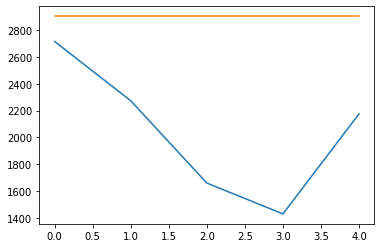

In [27]:
def ForecastDamped(y,h):
  
    obs=len(y)
    damped=np.zeros(obs*2).reshape(obs,2)
    damped[0,0]=y[0]
  
    inn=np.zeros(obs).reshape(obs,1)
  
  
    def fmsoe(param):
        k1=abs(param[0]);k2=abs(param[1]);k3=abs(param[2])
        for t in range(1,obs) :
            inn[t]=y[t]-damped[t-1,0]-k3*damped[t-1,1]
            damped[t,0] = damped[t-1,0]+k3*damped[t-1,1]+k1*inn[t]
            damped[t,1] = k3*damped[t-1,1]+k2*inn[t]
        return sum(inn**2)/obs
  
    result=scipy.optimize.minimize(fun=fmsoe,x0=[
        np.random.random(1),np.random.random(1),np.random.random(1)])
  
    k1=abs(result.x[0])
    k2=abs(result.x[1])
    k3=abs(result.x[2])
    if(k3>1):k3=1
  
    for t in range(1,obs):
    
        inn[t]=y[t]-damped[t-1,0]-k3*damped[t-1,1]
        damped[t,0] = damped[t-1,0]+k3*damped[t-1,1]+k1*inn[t]
        damped[t,1] = k3*damped[t-1,1]+k2*inn[t]
    

  
    Forecast=np.zeros(h)
    Forecast[0]=damped[obs-1,0]+k3*damped[obs-1,1]
    for i in range(1,h):
        Forecast[i]=Forecast[i-1]+damped[obs-1,1]*k3**i
    return Forecast
y= [ 9, 12,8, 45,30,36,8,70,107, 95,167,27,352,611,1460,2648,2268,3774,
     4050,5000, 4904,5160,7036,6999,7534,7238,7015,9170,8115,8558,10481,
     10846,9327,8655,8060 ,11186, 10719, 10569, 8678,8007, 6716,7271,
     11434 ,9237,6908,6877,5908, 5034, 5103, 4703, 6127, 8130,10553,
     5902 ,3951 ,3110,4585, 4681, 3942, 4663, 3438, 2538, 2239, 2786,
     3491, 2938, 2715, 2273, 1660, 1430, 2176]
y_h=ForecastDamped(y[:-5],5)
plt.plot(y[-5:])
plt.plot(y_h)